# ANOVA (F-TEST)-ANalysis Of VAriance

In [1]:
#https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
#https://reneshbedre.github.io/blog/anova.html
#https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
#https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/#anovapy

The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time. For example, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable. We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.   

F = Between group variability / Within group variability

# One Way F-test(Anova)

It tell whether two or more groups are similar or not based on their mean similarity and f-score. 


Example : there are 3 different category of plant(['ctrl', 'trt1', 'trt2']) .We need to verify their weight and need to check whether all 3 group are similar or not 

In [2]:
import pandas as pd
import matplotlib.pyplot as pl
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


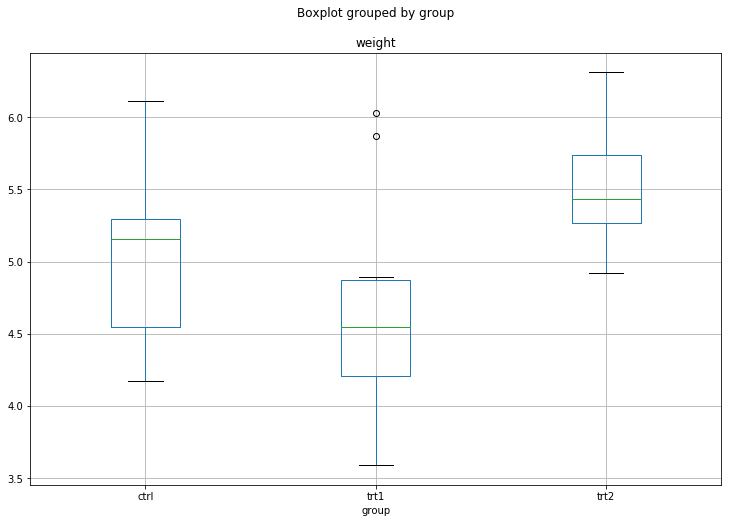

In [3]:
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))



In [4]:
ctrl = data['weight'][data.group == 'ctrl']

In [5]:
ctrl

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [6]:
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

In [7]:
d_data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [8]:
k = len(pd.unique(data.group))  # number of conditions
k

3

In [9]:
N = len(data.values)  # conditions times participants
N

30

In [10]:
n = data.groupby('group').size() #Participants in each condition
n

group
ctrl    10
trt1    10
trt2    10
dtype: int64

In [11]:
n = data.groupby('group').size()[0] #Participants in each condition
n

10

# Method 1-ANOVA in Python using SciPy

In [12]:
from scipy import stats

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

In [13]:
p

0.0159099583256229

In [14]:
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0159099583256229
reject null hypothesis


# Method2 - ANOVA in Python using Statsmodels

Install the Python package Statsmodels (pip install statsmodels)  
Import statsmodels api and ols:import statsmodels.api as sm and from statsmodels.formula.api import ols  
Import data using Pandas 
Set up your model mod = ols('weight ~ group', data=data).fit()  
Carry out the ANOVA: aov_table = sm.stats.anova_lm(mod, typ=2)  
Print the results: print(aov_table)  


####for ImportError: cannot import name 'factorial'  

You can check your versions with pip3 list  

Summary: copy&run the following in your terminal:  

pip3 uninstall statsmodels -y  
pip3 install statsmodels==0.10.0rc2 --pre --user   
and don't forget to restart the kernel of your jupyter notebook :)

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Set up the ANOVA model
## Ordinary Least Squares (OLS) model

mod = ols('weight ~ group',data=data).fit()

#Second, we use ols to set up our model using a formula

anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


# Method3 - Calculating using Python (i.e., pure Python ANOVA)

A one-way ANOVA in Python is quite easy to calculate so below I am going to show how to do it. First, we need to calculate the sum of squares between (SSbetween), sum of squares within (SSwithin), and sum of squares total (SSTotal).

In [16]:
#Sum of Squares Between

SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n)-(data['weight'].sum()**2)/N
SSbetween

3.766340000000014

In [17]:
SSbetween

3.766340000000014

In [18]:
#Sum of Squares Within
sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n
SSwithin

10.492090000000076

In [19]:
#Calculation of Sum of Squares Total
SStotal = sum_y_squared - (data['weight'].sum()**2)/N
SStotal

14.25843000000009

In [20]:
#degrees of freedom
DFbetween=k-1
print(DFbetween)
DFwithin=N-1
print(DFwithin)
DFtotal=N-1
print(DFtotal)

2
29
29


In [21]:
#How to Calculate Mean Square Between
#Mean square between is the sum of squares within divided by degree of freedom between
#MSbetween = SSbetween/DFbetween


#Calculation of Mean Square Within
#Mean Square within is also an easy calculation;

#MSwithin = SSwithin/DFwithin


#Calculating the F-value
#F = MSbetween/MSwithin



In [22]:
MSbetween = SSbetween/DFbetween
MSbetween

1.883170000000007

In [23]:
MSwithin = SSwithin/DFwithin
MSwithin

0.36179620689655434

In [24]:
F = MSbetween/MSwithin
F

5.2050573336675345

In [25]:
#calculating p-value
from scipy import stats
p=stats.f.sf(F,DFbetween,DFwithin)
p

0.011707369931239787

In [26]:
#Effect sizes
eta_squared=SSbetween/SStotal
eta_squared

0.264148296832119

In [27]:
omega_squared=(SSbetween-(DFbetween*MSwithin))/(SStotal+MSwithin)
omega_squared

0.2081190498113895

In [28]:
F,p,eta_squared,omega_squared

(5.2050573336675345,
 0.011707369931239787,
 0.264148296832119,
 0.2081190498113895)

# Two-way (two factor) ANOVA



https://reneshbedre.github.io/blog/anova.html


Example data for two-way ANOVA analysis, dataset

From dataset, there are two factors (independent variables) viz. genotypes and yield in years. Genotypes and years has five and three levels respectively (see one-way ANOVA to know factors and levels).

For this experimental design, there are two factors to evaluate, and therefore, two-way ANOVA is suitable for analysis. Here, using two-way ANOVA, we can simultaneously evaluate how type of genotype and years affects the yields of plants. If you apply one-way ANOVA here, you can able to evaluate only one factor at a time.

From two-way ANOVA, we can tests three hypotheses 1) effect of genotype on yield 2) effect of time (years) on yield, and 3) effect of genotype and time (years) interactions on yield

In [29]:
# load packages
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 

In [30]:
d

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [31]:
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])

In [32]:
d_melt

,Genotype,variable,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


In [33]:
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']

In [34]:
d_melt

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


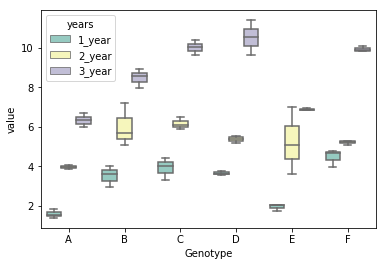

In [35]:
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3")

In [36]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


Interpretation:  

The P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.

Now, we know that genotype and time (years) differences are statistically significant, but ANOVA does not tell which genotype and time (years) are significantly different from each other. To know the pairs of significant different genotype and time (years), perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

Similar to one-way ANOVA, you can use Levene and Shapiro-Wilk test to validate the assumptions for homogeneity of variances and normal distribution of residuals.